In [2]:
import sys
sys.path.append(r"C:\Users\shailaja.akella\Dropbox (Personal)\variability_phase4\state_dependent_variability_paper\figure_codes")

import matplotlib.pyplot as plt
import numpy as np
import math
import operator
import networkx as nx


import data_utils as du
import lfp_utils as lu
import state_utils as su


In [3]:
state_names = ['High frequency', 'Intermediate', 'Low frequency']
short_state_names = [r"$S_{H}$", r"$S_{I}$", r"$S_{L}$"]
state_colors = ['tab:green', 'tab:blue', 'mediumvioletred']

probes = ['probeC', 'probeD', 'probeF', 'probeE', 'probeB', 'probeA']
stim = 'natural_movie_one_more_repeats'
Fs_lfp = 1250
Fs = 30
num_states = 3

session_ids = [767871931, 771990200, 778240327, 778998620, 786091066,
            794812542, 831882777, 839068429, 847657808, 840012044,
            766640955, 768515987, 771160300, 774875821, 779839471,
            781842082, 787025148, 789848216, 793224716, 816200189,
            819186360, 819701982, 821695405, 829720705, 835479236]

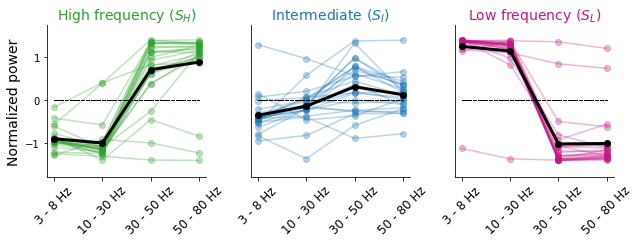

In [4]:
# FIGURE 1E

freq = ['3 - 8 Hz', '10 - 30 Hz', '30 - 50 Hz', '50 - 80 Hz']
n_bands = 4
def_all = np.zeros((len(session_ids), n_bands, num_states))

fig, ax = plt.subplots(1, 3, figsize = (9, 3.5)) ;
for sess_no, session_id in enumerate(session_ids):
    state_def = np.load('../data/state_definitions/definition_' + str(session_id) + '.npy')
    for b in range(n_bands):
        state_def[b, :] = (state_def[b] - np.mean(state_def[b]))/np.std(state_def[b])
    for s_no in range(num_states):
        x = state_def[:, s_no]
        def_all[sess_no, :, s_no] = x 
        ax[s_no].plot(np.arange(4), x , marker = 'o', color = state_colors[s_no], alpha = 0.3)
        ax[s_no].set_ylim(-1.8, 1.75)
        ax[s_no].plot(np.arange(4), np.zeros(4), ls = '--', color = 'k', lw = 1)
        if s_no != 0:
            ax[s_no].set_yticks([])
        else:
            ax[s_no].set_yticks([-1, 0, 1])
            ax[s_no].set_ylabel('Normalized power', fontsize = 14)
        ax[s_no].set_xticks(np.arange(4))
        ax[s_no].set_xticklabels(freq, rotation = 45, fontsize = 12)
        ax[s_no].spines['right'].set_visible(False)
        ax[s_no].spines['top'].set_visible(False)
        ax[s_no].spines['bottom'].set_color('k')
        ax[s_no].spines['left'].set_color('k')
        ax[s_no].tick_params(bottom = True, left = True, right = False, top = False)
        
for s_no in range(num_states):
    ax[s_no].plot(np.arange(4), np.mean(def_all[:, :, s_no],axis = 0), lw = 3, color = 'k', marker = 'o')
    ax[s_no].set_title(state_names[s_no] + ' (' + short_state_names[s_no]+ ')', color = state_colors[s_no], fontsize = 14);
plt.tight_layout();

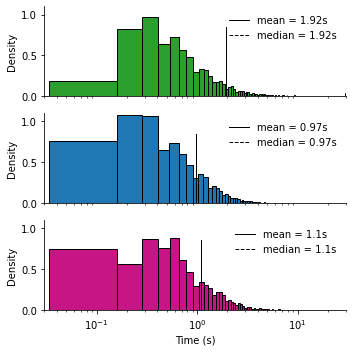

In [4]:
# FIGURE 1F
dwell_times = []
for session_id in session_ids: 
    states = np.load('../data/states/states_' + str(session_id) + '.npy') 
    dwell_times.append(su.state_dwell_times(states, Fs))

dwell_times = [np.concatenate([dwell_times[session_no][state_no] for session_no in range(len(session_ids))]) for state_no in range(num_states)]

means = [np.nanmean(dwell_times[state_no]) for state_no in range(num_states)]
medians = [np.nanmean(dwell_times[state_no]) for state_no in range(num_states)]

fig, ax = plt.subplots(3,1, figsize =(5, 5))

for state_no in range(num_states):
    ax[state_no].hist(dwell_times[state_no], bins = 240, color = state_colors[state_no], density = True, edgecolor='k')
    ax[state_no].plot(means[state_no]*np.ones(10), np.linspace(0, 0.85, 10), color = 'k',
                       lw = 1, label = 'mean = ' + str(np.round(means[state_no], 2)) + 's')
    ax[state_no].plot(medians[state_no]*np.ones(10), np.linspace(0, 0.85, 10), color = 'k', lw = 1, 
                       ls = '--', label = 'median = ' + str(np.round(medians[state_no], 2)) + 's')
    ax[state_no].set_ylim(0, 1.1)
    ax[state_no].set_xlim(3*1e-2, 3*1e1)
    ax[state_no].spines['right'].set_visible(False)
    ax[state_no].spines['top'].set_visible(False)
    ax[state_no].spines['bottom'].set_color('k')
    ax[state_no].spines['left'].set_color('k')
    ax[state_no].set_ylabel('Density', fontsize = 10)
    ax[state_no].tick_params(bottom = True,left = True, right = False, top = False)
    ax[state_no].legend(loc = 'upper right' ,frameon = False, fontsize = 10)
    ax[state_no].set_xscale('log')
    if state_no != 2:
        ax[state_no].set_xticks([])
ax[2].set_xlabel('Time (s)',fontsize = 10)
plt.tight_layout()

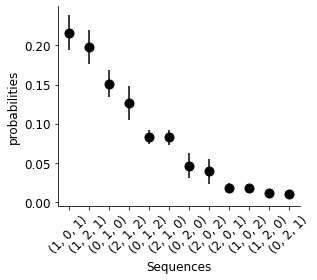

In [5]:
# FIGURE 1G

sequence_prob_len3 = su.sequence_probability(session_ids, 3) #3 steps

mean_prob = {key: np.mean(sequence_prob_len3 [key]) for key in sequence_prob_len3 .keys()}
sorted_prob = dict(sorted(mean_prob.items(), key=operator.itemgetter(1),reverse=True))
sem_prob = {key: np.std(sequence_prob_len3 [key])/np.sqrt(len(sequence_prob_len3 [key])) for key in sorted_prob.keys()}

fig, ax = plt.subplots(figsize = (4.5, 4))
keys= [str(key) for key in sorted_prob.keys()]
plt.errorbar(keys, sorted_prob.values(), yerr = list(sem_prob.values()), color='k', 
              ls = 'none', marker = 'o', ms = 9)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('k')
ax.spines['left'].set_color('k')
ax.tick_params(bottom = True,left = True, right = False, top = False)
plt.ylabel('probabilities',fontsize = 12)
plt.xlabel('Sequences',fontsize = 12)
plt.xticks(fontsize = 12 ,rotation = 45)
plt.yticks(fontsize = 12)
plt.tight_layout()

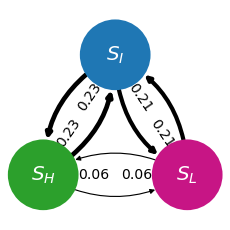

In [6]:
sequence_prob_len2 = su.sequence_probability(session_ids, 2) #2 steps  

G = nx.DiGraph()
G.add_nodes_from(short_state_names)
pos = nx.spring_layout(G)
weights = []

M_final = np.zeros((num_states, num_states))
edge_label = {(node1, node2): [] for node1 in short_state_names for node2 in short_state_names}
for key in sequence_prob_len2.keys():
        M_final[key[0], key[1]] = np.nanmean(sequence_prob_len2[key])

for i, node1 in enumerate(short_state_names):
    for j, node2 in enumerate(short_state_names):
        if M_final[i, j] > 0:
            G.add_edge(node1, node2)
            weights.append(M_final[i,j]*20)
            edge_label[(node1, node2)] = np.round(M_final[i, j], 2)

plt.figure(figsize = (3, 3))
positions = {short_state_names[0]: [0, 0], short_state_names[1]: [0.5, 0.5], short_state_names[2]:[1, 0]}
nx.draw(G, with_labels=True, connectionstyle="arc3,rad=0.3",
        node_color=state_colors, alpha = 1, edgecolors = 'none',font_size = 20, font_color = 'white',
        font_weight = 'bold', node_size=5000, width=weights,pos= positions) 

nx.draw_networkx_edge_labels(G, positions, edge_labels = edge_label, label_pos = 0.35,rotate = 45, font_size = 14)
G.is_directed()
plt.ylim(-0.2, 0.7);
plt.xlim(-0.25, 1.25);